# Agenda

- Traditional Programming vs ML

- Types of Machine Learning 

    - Supervised Learning 
    
    - Unsupervised Learning
    
    - Reinforcement Learning
    
- Learning problem definition and formalization

# Traditional Programming vs ML

<img src= "images/ML_vs_programming.png" width =550/>

[Image Source](https://github.com/rasbt/stat479-machine-learning-fs19/blob/master/01_overview/01-ml-overview__notes.pdf)

A More formal definition of ML: 

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E. (Tom Mitchell)

<img src = "images/dogs_vs_cats.jpeg" width = 1200 />

[Image Source](http://adilmoujahid.com/posts/2016/06/introduction-deep-learning-python-caffe/?utm_content=buffer82f2c&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer)

E: Collected and labeled dataset of dogs and cats

T: To classify whether a photo has a cat or dog

P: Accuracy of the classification

[Your Turn!](https://forms.gle/2RwC8opUi6bDVpER6)

# Types of Machine Learning 


<img src = "images/Types of Machine Learning.png" width = 850 />

## Supervised Learning

<img src ="images/iris_data.png" width = 750/>

[Image Source](https://python.astrotech.io/_images/iris-dataset.png)

In [5]:
import numpy as np

import pandas as pd

from sklearn.datasets import load_iris

data,target = load_iris(return_X_y=True, as_frame= True)

iris_df = pd.concat([data,target], axis = 1,)

iris_df.loc[99]

sepal length (cm)    5.7
sepal width (cm)     2.8
petal length (cm)    4.1
petal width (cm)     1.3
target               1.0
Name: 99, dtype: float64

<img src ="images/supervised.jpg" width = 750/>

## Unsupervised Learning

__Clustering__

<img src = "images/clustering-handson-ml.png" width = 750 />

In [12]:
from sklearn.datasets import load_iris

data_np = load_iris()["data"]

feature_names = load_iris()['feature_names']

In [13]:
pd.DataFrame(data = data, columns= feature_names)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


[Image Source](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

__Dimension Reduction__

<img src= "images/images_dimension_reduction.png" width = 750/>



[Image Source](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html)

[ 0.  0.  6. 16. 15.  5.  0.  0.  0.  1. 16. 14.  8. 15.  1.  0.  0.  9.
 13.  1.  0. 12.  6.  0.  0.  5.  9.  0.  0.  9. 10.  0.  0.  6.  9.  0.
  0.  9. 11.  0.  0.  7. 16.  1.  0. 11. 11.  0.  0.  3. 16. 11. 13. 16.
  8.  0.  0.  0.  8. 16. 16. 12.  1.  0.] 0


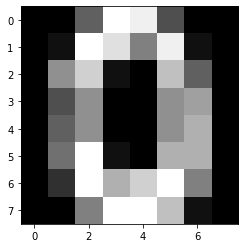

In [24]:
from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits(n_class=6)
num = np.random.randint(0, 1000)

img = digits.data[num]

plt.imshow(img.reshape(8,8), cmap ="gray" )

print(img, digits.target[num])

__Anomally Detection__

<img src = "images/anomally.png" width = 750/>

[Image Source](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

## Reinforcement Learning

<img src = "images/reinforcement.png" width = 750/>

[Types of ML](https://forms.gle/twHHWvgNk5QhMsEs7)

## Building ML Systems

<img src = "images/workflow.png" width =750/>

[Image Source](https://github.com/rasbt/stat479-machine-learning-fs19/blob/master/01_overview/01-ml-overview__notes.pdf)

## More Explicitly: Components of ML Systems

- Define Problem to be solved.

- Collect data.

- Choose an algorithm class.

- Choose an optimization metric for the learning model.

- Choose a metric for evaluation.

__Note!__

- optimization and model evaluation are different tasks!

    - For optimization you might want to maximize log-Likelihood, or minimize mean squared errors, maximize information gain etc.

    - For model evaluation, you might want to check: accuracy, precision, recall etc.


# Supervised Learning in depth

## Notation and Conventions
For the features we will use $\mathbf{X}$

$$ \begin{equation*}
\mathbf{X} = 
\begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_{N,1} & x_{N,2} & \cdots & x_{N,p} 
\end{pmatrix}
\end{equation*}
$$

and for the target we will use $\mathbf{y}$:

$$ 
\begin{align}
    y &= \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{N}
         \end{bmatrix}
  \end{align}
$$

In [26]:
## show data
data
## show target

target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## Formulation of the problem

Suppose we observe

- a quantitative response $\mathbf{Y}$

- predictors (features) $X_{1}, X_{2}, \cdots, X_{p}$

- We assume that there is some relationship between $\mathbf{Y}$ and $\mathbf{X} = (X_{1}, X_{2}, \cdots, X_{p})$


$$ \mathbf{Y} = f(\mathbf{X}) + \varepsilon$$

Problem: $f$ is unknown! (How many different functions can exists?)

<img src = "images/formulation.png" width = 750/>

[Image Source](https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

## How to Estimate f?

- Parametric
- Non-Parametric Models



__Parametric Models__

- Assumes a certain format for $f$. For example linear models: $f(X) = \beta_{1}X_{1} + \cdots + \beta_{p}X_{p}$

- Simplifies the problem

- Usually a little bit naive to capture complicated relations. 

- Either not flexible enough (lead to underfitting) or too flexible (lead to overfitting).

<img src = "images/poly.png" width =750/>

__Non-Parametric Models__

- No assumptions about the form of $f$

- Usually more flexible to detect true relation between $X$ and $y$.

- Needs a very large number of observations otherwise they might overfit.

## Some examples of ML algorithms we will cover in this class

- Linear Models

- Tree based models

- Ensemble Models

- Instance-based models

- K-Means, Hierarchical Models

- Dimension Reduction Algorithms

- Artificial Neural Networks

Review of today's lecture

- We've seen the differences between traditional programming vs ML.

- We've discussed different types of ML: Especially three types

    - Supervised 
    - Unsupervised
    - Reinforcement
 
- We learned the components of ML workflow.

- We learnt formulation of ML problem in supervised setting.

[Week-2 Exit Ticket](https://forms.gle/Upqvu9AVxeomzt7E6)

# Extra Resources

[Dimension Reduction](https://www.youtube.com/watch?v=wvsE8jm1GzE&ab_channel=GoogleDevelopers)

[Sebastian Raschka - Introduction to ML](https://github.com/rasbt/stat479-machine-learning-fs19/blob/master/01_overview/01-ml-overview__notes.pdf)